# Лабораторная работа 3

## Клепиков Никита

Dataset: Students Performance in Exams

Ссылка на датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

Группа: 6132 - 010402D

Для начала необходимо подключить необходимые для выполнения лабораторной работы библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

1 Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [2]:
students = pd.read_csv('Students.csv')

* gender - пол (бинарный)
        male - мужской
        female - женский
* race/ethnicity - раса/этническая принадлежность (категориальный)
        group A
        group B
        group C
        group D
        group E

* parental level of education - уровень образования родителей (категориальный)
        bachelor's degree - степень бакалавра
        some college - несколько колледжей
        master's degree - степень магистра
        associate's degree - степень младшего специалиста
        high school - средняя школа
        some high school - несколько средних школ
* lunch - обед (бинарный)
        standard - стандартный
        free/reduced - бесплатный/льготный
* test preparation course - курс подготовки к экзаменам (бинарный)
        completed - пройден
        none - не пройден
* math score - баллы по математике (числовой)

* reading score - баллы по чтению (числовой)

* writing score - баллы по письменному экзамену (числовой)

* sum - сумма баллов (числовой)

* status - статус (бинарный)
        clever - умный
        beautiful - красивый
* gpa - средний балл (числовой)

1. Многоклассовая классификация:

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [3]:
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
# Из train-test формируем X_train, X_test
X_train = pd.DataFrame()
X_train['reading score'] = students['reading score']  
X_test = pd.DataFrame()
X_test['writing score'] = students['writing score']  

# "y" оставляем прежним
y_train = students['math score']
y_test = students['math score']

# Создаем модель и обучаем ее
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [5]:
model.score(X_test, y_test)

0.053

1.2. То же самое с использованием кросс-валидации

In [6]:
scores = cross_val_score(model, X_test, y_test, cv=3)
scores.mean()

0.033000065934197666

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [7]:
scores_data = pd.DataFrame()

In [8]:
max_depth_values = range(1,100)

<AxesSubplot:xlabel='max_depth'>

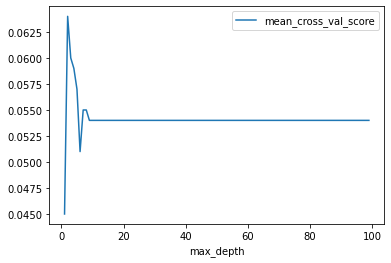

In [9]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_scores_data = pd.DataFrame({'max_depth':[max_depth],
                                    'mean_cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_scores_data)
    
scores_data.plot.line(x="max_depth", y="mean_cross_val_score")

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор)

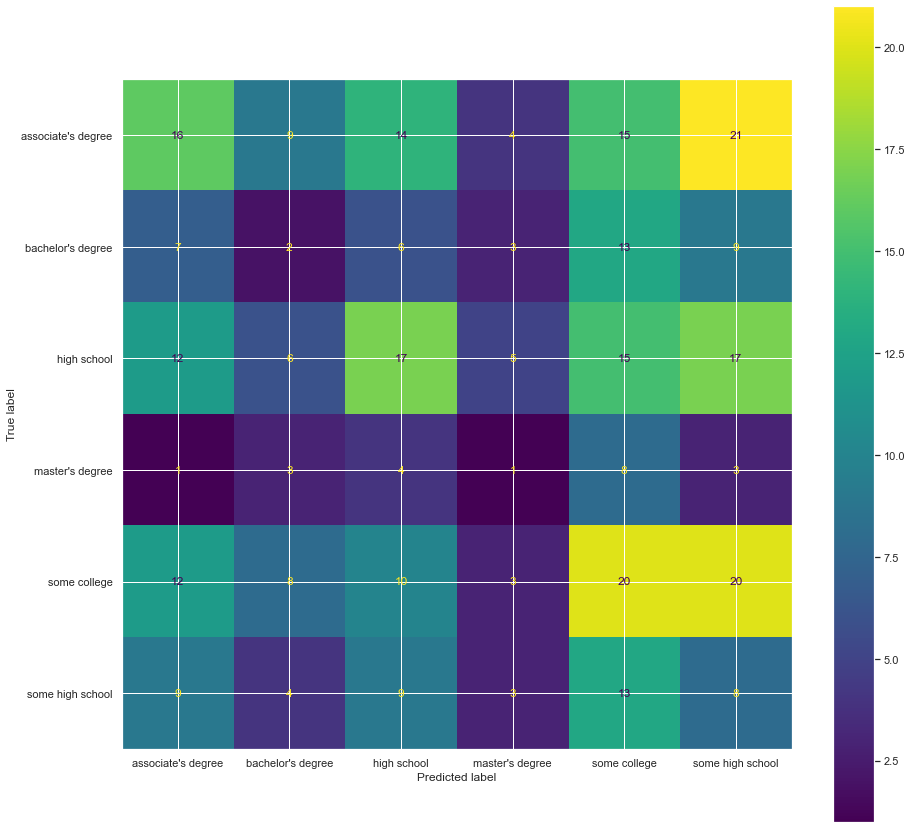

In [10]:
sns.set(rc={'figure.figsize':(15,15)}) # задаем настройки размера изображений
X = students[["math score","reading score","writing score"]]
y = students["parental level of education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

<AxesSubplot:>

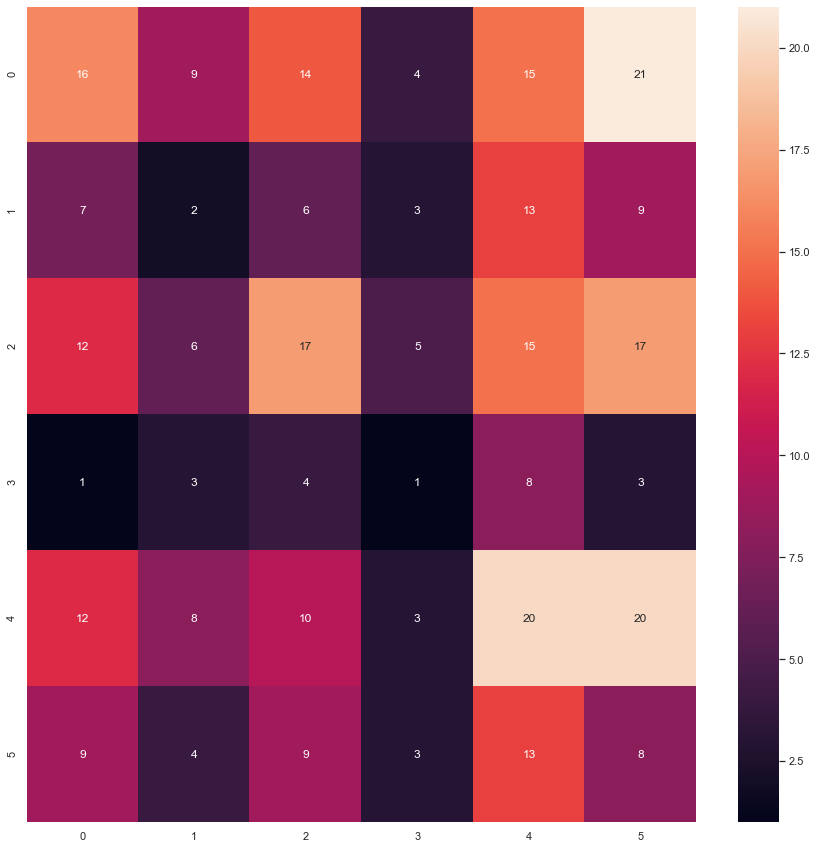

In [11]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True)

2. Бинарная классификация.

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report



In [12]:
students_new = pd.get_dummies(students)

In [13]:
X = students_new[["math score","reading score","writing score"]]
y = students_new.gender_female

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8090909090909091
Precision: 0.8044692737430168
Recall: 0.8372093023255814
F1-score: 0.8205128205128205
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       158
           1       0.80      0.84      0.82       172

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



3. Использование нормализации признаков В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [17]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # применить масштабирование к обучающим данным

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [18]:
pipe.score(X_test, y_test)  # применять масштабирование к тестовым данным без утечки обучающих данных.

0.92